

[Fonte 1](https://www.kaggle.com/tianyuantan/loan-status-prediction-90)



# Introdução

- A empresa procura automatizar (em tempo real) o processo de qualificação do crédito com base nas informações prestadas pelos clientes durante o preenchimento de um formulário de candidatura online. Espera-se com o desenvolvimento de modelos de ML que possam ajudar a empresa a prever a aprovação de empréstimos na aceleração do processo de tomada de decisão para determinar se um solicitante é elegível para um empréstimo ou não.

# Objetivo

👉 Este caderno tem como objetivo:

Analise os dados do cliente fornecidos no conjunto de dados (EDA)
Construir vários modelos de ML que podem prever a aprovação de empréstimos
👨‍💻 Os modelos de aprendizado de máquina usados neste projeto são:

- Regressão Logística
- K-vizinho mais próximo (KNN)
- Máquina de vetor de suporte (SVM)
- Baías ingénuas
- Árvore de Decisão
- Floresta Aleatória
- Gradient Boost

# Descrição do conjunto de dados 🧾¶
👉 Existem 13 variáveis neste conjunto de dados:

- 8 variáveis categóricas,
- 4 variáveis contínuas, e
- 1 variável para acomodar o ID do empréstimo.

# Importando bibliotecas e os dados

In [ ]:
#link: https://www.kaggle.com/caesarmario/86-eligibility-prediction-w-various-ml-models

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('train_loan.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Explorando as variáveis categóricas

In [ ]:
df.Loan_ID.value_counts(dropna=False)

LP001945    1
LP002784    1
LP002625    1
LP002366    1
LP002837    1
           ..
LP002585    1
LP002116    1
LP002379    1
LP001978    1
LP001279    1
Name: Loan_ID, Length: 614, dtype: int64

In [ ]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [ ]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

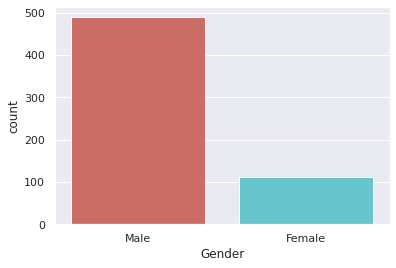

In [ ]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [ ]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Porcentagem de candidatos do sexo masculino: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Porcentagem de candidatos do sexo feminino: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Porcentagem de valores ausentes: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Porcentagem de candidatos do sexo masculino: 79.64%
Porcentagem de candidatos do sexo feminino: 18.24%
Porcentagem de valores ausentes: 2.12%


In [ ]:
# casado 

In [ ]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

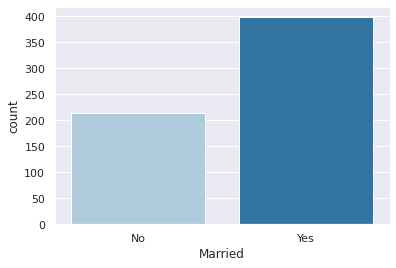

In [ ]:
sns.countplot(x='Married', data=df, palette = 'Paired')

In [ ]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("% de casados: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("% de nao casados: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("% de valores ausentes: {:.2f}%".format((countNull / (len(df.Married))*100)))

% de casados: 64.82%
% de nao casados: 34.69%
% de valores ausentes: 0.49%


In [ ]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

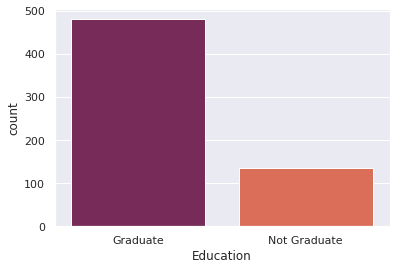

In [ ]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [ ]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("% de graduados: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("% nao graduados: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("% valores faltantes: {:.2f}%".format((countNull / (len(df.Education))*100)))

% de graduados: 78.18%
% nao graduados: 21.82%
% valores faltantes: 0.00%


In [ ]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

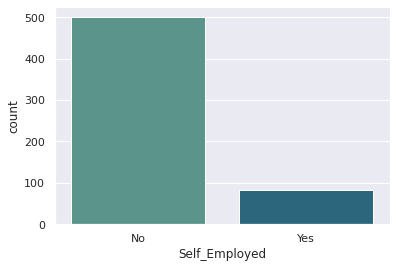

In [ ]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [ ]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("% trabalhadores por conta própria: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("% autônomos: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("% valores faltantes: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

% trabalhadores por conta própria: 81.43%
% autônomos: 13.36%
% valores faltantes: 5.21%


# Explorando as variáveis númericas

In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


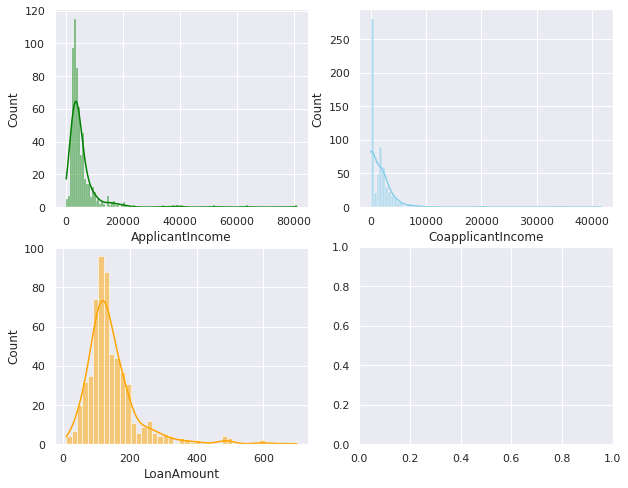

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

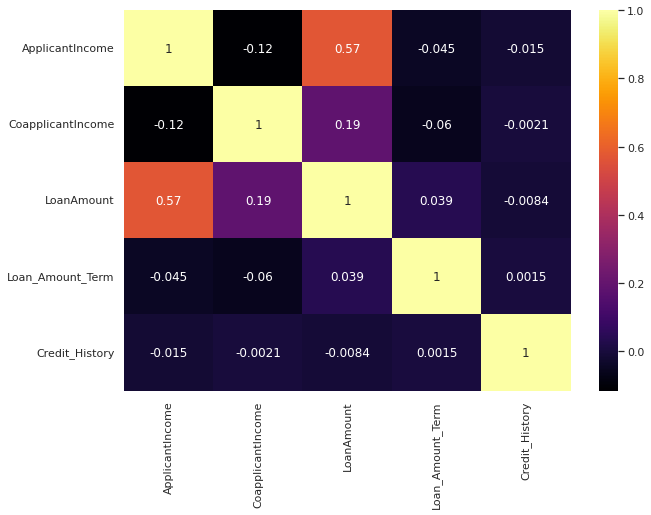

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno') 

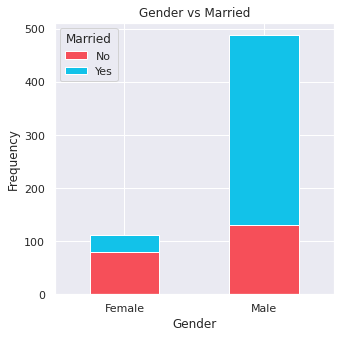

In [ ]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

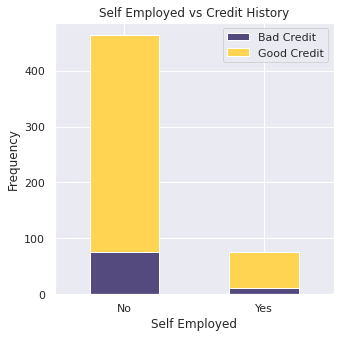

In [ ]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb1ce48dd0>,
      dtype=object)

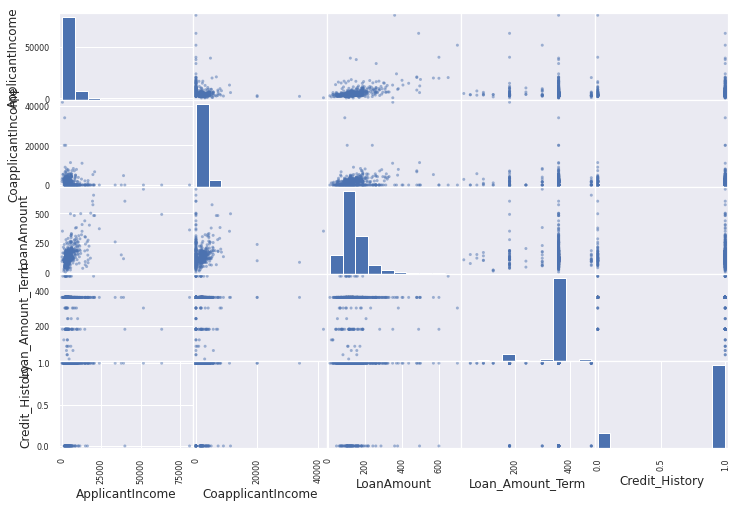

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Loan_Status"]
scatter_matrix(df, figsize=(12, 8))

# 5. Pré-processamento de dados

#### 5.1 Eliminar variáveis desnecessárias

In [ ]:
df = df.drop(['Loan_ID','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area'], axis = 1)

#### 5.2 Tratando valores nulos (Missing Values)

* Dependents: Assumindo o valor majoritário da coluna.

* Self_Employed: Assumindo o valor majoritário da coluna.

* Loan_Amount_Term: Preenchendo com valor médio da coluna.

* Credit_History: assumindo o valor marjoritário da coluna.

* Married: Assumindo o valor majoritário da coluna.

* Gender: Assumindo o valor majoritário da coluna.

In [ ]:
df.isnull().sum()

Gender             13
Married             3
Dependents         15
Education           0
Self_Employed      32
ApplicantIncome     0
LoanAmount         22
Loan_Status         0
dtype: int64

In [ ]:
# Categóricas
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
#df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
#df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
#numérica
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Gender             0
Married            0
Dependents         0
Education          0
Self_Employed      0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64

#### 5.3 One-hot (codificação)
- Nesta seção, transformarei variáveis categóricas em uma forma que poderia ser fornecida por algoritmos de ML para fazer uma previsão melhor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           614 non-null    object 
 1   Married          614 non-null    object 
 2   Dependents       614 non-null    object 
 3   Education        614 non-null    object 
 4   Self_Employed    614 non-null    object 
 5   ApplicantIncome  614 non-null    int64  
 6   LoanAmount       614 non-null    float64
 7   Loan_Status      614 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 38.5+ KB


In [ ]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
0,Male,No,0,Graduate,No,5849,146.412162,Y
1,Male,Yes,1,Graduate,No,4583,128.000000,N
2,Male,Yes,0,Graduate,Yes,3000,66.000000,Y


In [ ]:
gender_values = {'Female': 0, 'Male':1}
married_values = {'No': 0, 'Yes': 1}
education_values = {'Graduate': 0, 'Not Graduate': 1}
employed_values = {'No': 0, 'Yes': 1}
dependent_values = {'3+': 3, '0':0, '2':2, '1':1}
loan_values = {'Y': 1, 'N':0}
df.replace({'Gender': gender_values, 
                'Married': married_values,
                'Education': education_values,
                'Self_Employed': employed_values,
                'Dependents': dependent_values,
                'Loan_Status': loan_values }, inplace=True)

In [ ]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
0,1,0,0,0,0,5849,146.412162,1
1,1,1,1,0,0,4583,128.000000,0
2,1,1,0,0,1,3000,66.000000,1


In [ ]:
df.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
#df = pd.get_dummies(df)

# Drop columns
#df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
##              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Renomear o nome das colunas
#new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
#       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
#       'Loan_Status_Y': 'Loan_Status'}
       
#df.rename(columns=new, inplace=True)

* Remover Outliers & valores infinitos

In [ ]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

#### 5.5 Criando X e Y

Os recursos dependentes (status do empréstimo) serão separados dos recursos independentes.

In [ ]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

#### 5.6 Técnica SMOTE
 - Na exploração anterior, pode-se ver que o número entre empréstimos aprovados e rejeitados está desequilibrado. Nesta seção, a técnica de sobreamostragem será usada para evitar sobreajuste

In [ ]:
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
0,1,0,0,0,0,5849,146.412162,1
1,1,1,1,0,0,4583,128.000000,0
2,1,1,0,0,1,3000,66.000000,1


In [ ]:
X, y = SMOTE().fit_resample(X, y)

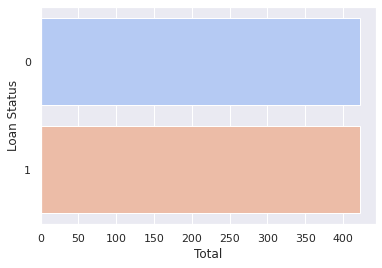

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

#### 5.7 Data Normalization
Nesta seção, a normalização de dados será realizada para normalizar o intervalo de variáveis independentes ou recursos de dados

In [ ]:
X = MinMaxScaler().fit_transform(X)

#### 5.8 Dividindo o conjunto de dados

O conjunto de dados será dividido em 80% de trem e 20% de teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Modelo



#### 6.1 Logistic Regression

In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        86
           1       0.60      0.63      0.61        83

    accuracy                           0.61       169
   macro avg       0.61      0.61      0.61       169
weighted avg       0.61      0.61      0.61       169

[[51 35]
 [31 52]]
LR accuracy: 60.95%


#### 6.2 K-Nearest Neighbour (KNN)

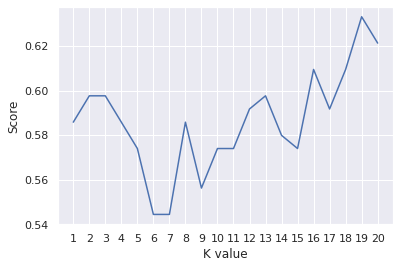

KNN best accuracy: 63.31%


In [ ]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

#### 6.3 Support Vector Machine (SVM)

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57        86
           1       0.57      0.63      0.60        83

    accuracy                           0.59       169
   macro avg       0.59      0.59      0.59       169
weighted avg       0.59      0.59      0.59       169

[[47 39]
 [31 52]]
SVC accuracy: 58.58%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


#### 6.4 Naive Bayes

In [ ]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        86
           1       0.60      0.64      0.62        83

    accuracy                           0.62       169
   macro avg       0.62      0.62      0.62       169
weighted avg       0.62      0.62      0.62       169

[[51 35]
 [30 53]]
Categorical Naive Bayes accuracy: 61.54%


#### 6.4.2 Gaussian NB

In [ ]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        86
           1       0.60      0.64      0.62        83

    accuracy                           0.61       169
   macro avg       0.61      0.61      0.61       169
weighted avg       0.61      0.61      0.61       169

[[50 36]
 [30 53]]
Gaussian Naive Bayes accuracy: 60.95%


#### 6.5 Decision Tree

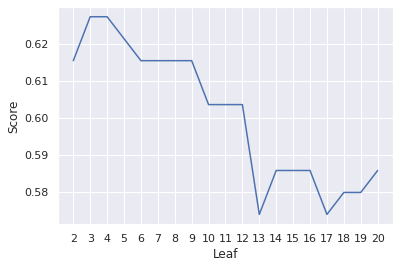

Decision Tree Accuracy: 62.72%


In [ ]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

#### 6.6 Random Forest

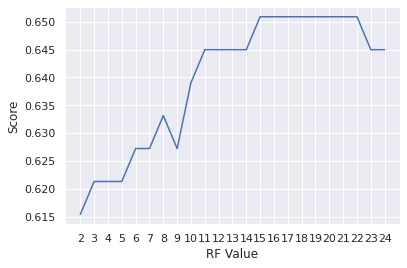

Random Forest Accuracy:  65.09%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

#### 6.7 Gradient Boosting

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=50, n_estimators=300,
                           subsample=0.5)
0.6665775401069518
{'subsample': 0.5, 'n_estimators': 300, 'max_leaf_nodes': 50, 'max_depth': 5}
2


In [ ]:
GBclassifier = GradientBoostingClassifier(subsample=1, n_estimators=400, max_depth=5, max_leaf_nodes=20)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69        86
           1       0.68      0.65      0.67        83

    accuracy                           0.68       169
   macro avg       0.68      0.68      0.68       169
weighted avg       0.68      0.68      0.68       169

[[61 25]
 [29 54]]
Gradient Boosting accuracy: 68.05%


# 7. Comparação de modelo

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
7,Gradient Boost,68.047337
6,Random Forest,65.088757
1,K Neighbors,63.313609
5,Decision Tree,62.721893
3,Categorical NB,61.538462
0,Logistic Regression,60.946746
4,Gaussian NB,60.946746
2,SVM,58.579882


* Em geral, pode-se ver que todo o modelo pode atingir até 80% de precisão, exceto Gradient Boost.
* Como pode ser visto, SVM e Random Forest podem atingir até 86,67% de precisão.


#### Teste de Classificação

In [ ]:
teste = np.array([[1,1,3,0,0,9504,275.0]])
DTclassifier.predict(teste)

array([1])

# 8. Métricas de avaliação do melhor modelo

In [ ]:
clf_rf = RFclassifier

In [ ]:
print(pd.crosstab(y_test,clf_rf.predict(X_test), rownames = ['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        54  32   86
1        28  55   83
All      82  87  169


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test, clf_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.63      0.64        86
           1       0.63      0.66      0.65        83

    accuracy                           0.64       169
   macro avg       0.65      0.65      0.64       169
weighted avg       0.65      0.64      0.64       169



# Persistindo o melhor modelo em disco

In [ ]:
RFclassifier.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=24, n_estimators=1000, random_state=1)

In [ ]:
import joblib

In [ ]:
#from sklearn.externals import joblib

#### Persistindo o melhor modelo em disco

In [ ]:
joblib.dump(clf_rf, 'model.pkl')


['model.pkl']

In [ ]:
#Listando os arquivos em disco
!ls

model.pkl  sample_data	train_loan.csv


In [ ]:
#Carregando o modelo a partir do disco para a memória
model = joblib.load('model.pkl')

In [ ]:
# Verificando atributos do modelo
print("Atributos do Modelo:\n\nClasses:{}\n\nEstimators:{}\n\nParametros:{}".format(model.classes_,model.n_estimators,model.base_estimator))

Atributos do Modelo:

Classes:[0 1]

Estimators:1000

Parametros:DecisionTreeClassifier()


Teste de Classificação

In [ ]:
teste = np.array([[1,1,3,0,0,9504,275.0]])
model.predict(teste)

array([1])

Probabilidades de Classes

In [ ]:
model.predict_proba(teste)

array([[0.42907763, 0.57092237]])

agora iremos pegar esse modelo e construir uma Web API para disponibilizar esse modelo para outras aplicações.

# Código da Web API